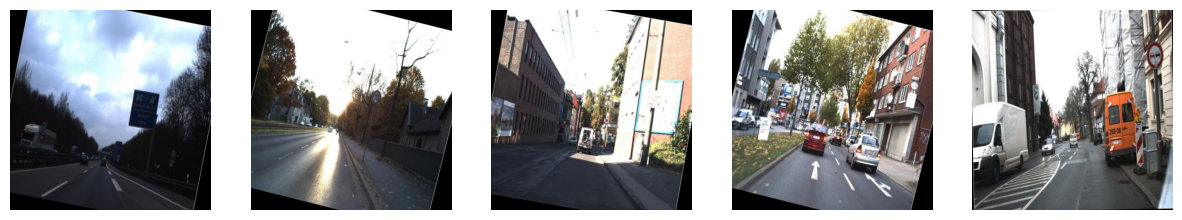

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import random

def load_images_from_folder(folder, count=5):
    images = []
    for _ in range(count):
        filename = random.choice(os.listdir(folder))  # Randomly pick a file
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            images.append(img)
    return images

def show_images(images, titles=None):
    plt.figure(figsize=(15, 10))
    for i, image in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image)
        if titles:
            plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Set the path to the directory containing the images
folder_path = r"D:\Faculty materials\bachelors\datasets\GTSDB\train\images"

# Load and display the images
images = load_images_from_folder(folder_path, 5)
show_images(images)


In [16]:
import os
import matplotlib.pyplot as plt

def plot_class_distribution_from_folders(root_path):
    # This dictionary will store the class ID and the number of images in each class
    class_counts = {}

    # List all directories in the root path
    for class_id in os.listdir(root_path):
        class_path = os.path.join(root_path, class_id)
        if os.path.isdir(class_path):  # Make sure it's a directory
            # Count the number of image files in the directory
            num_images = len([name for name in os.listdir(class_path) if name.endswith(('.png', '.jpg', '.jpeg', '.ppm'))])
            # Convert class_id to integer to sort numerically later
            class_counts[int(class_id)] = num_images

    # Sort the dictionary by class_id (key)
    sorted_class_counts = dict(sorted(class_counts.items()))

    # Plotting the class distribution
    plt.figure(figsize=(12, 8))
    # Creating a bar plot; keys and values from the sorted dictionary
    plt.bar([str(k) for k in sorted_class_counts.keys()], sorted_class_counts.values(), color='skyblue')
    plt.xlabel('Class ID')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=90)  # Rotates the class labels to prevent overlap
    plt.grid(False)
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1)
    plt.margins(x=0, y=0)  # Reduce margins to use maximum space
    ax = plt.gca()  # Get current axes
    ax.spines['top'].set_visible(False)  # Hide top spine
    ax.spines['right'].set_visible(False)    
    plt.tight_layout()
    plt.show()

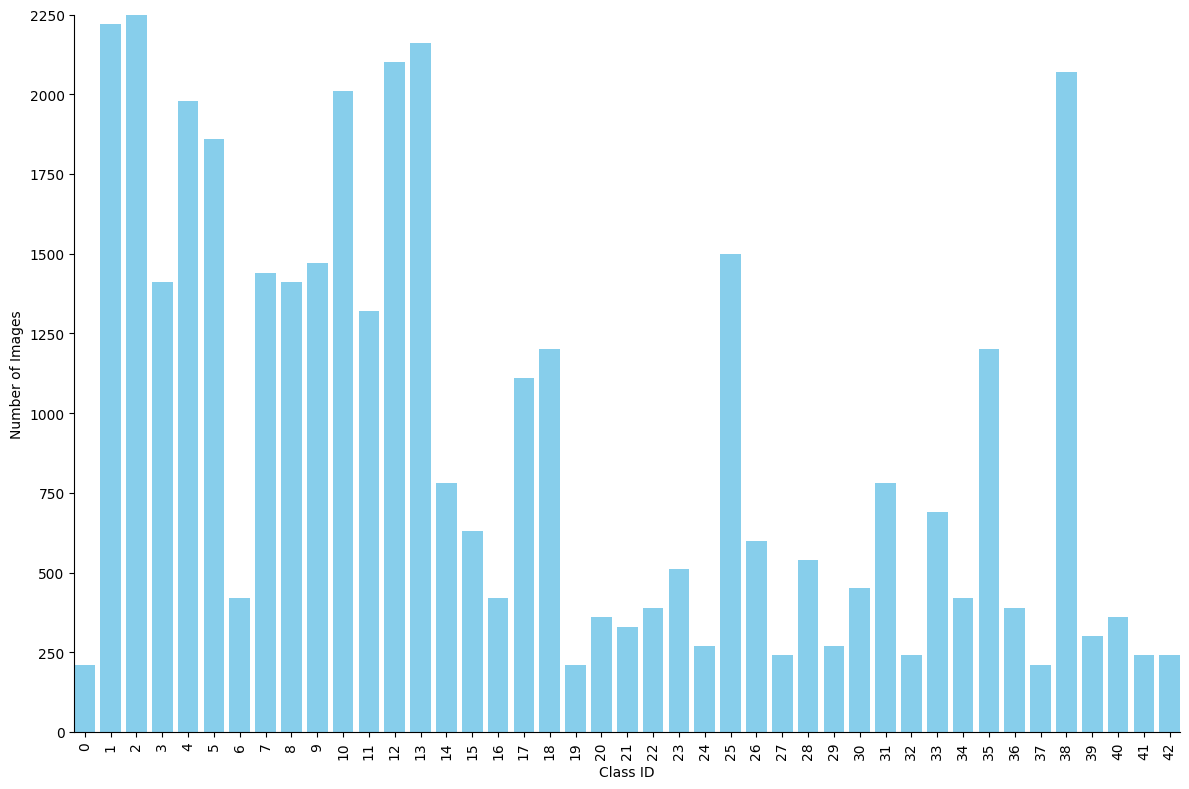

In [17]:
plot_class_distribution_from_folders(r"D:\Faculty materials\bachelors\datasets\GTSRB\Train")

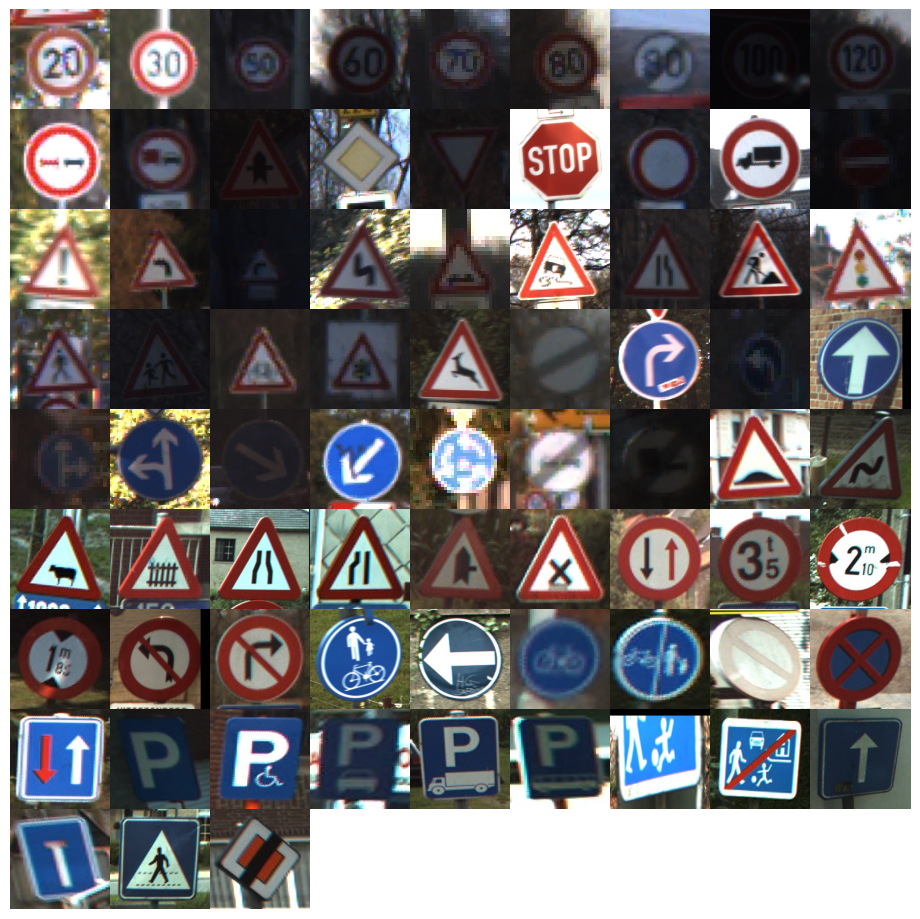

In [10]:
import cv2
import matplotlib.pyplot as plt
import os
import random

def load_random_images_from_classes(root_path, classes, samples_per_class=1):
    images = []  # Stores the images
    labels = []  # Stores the corresponding labels (class IDs)

    for cls in classes:
        class_folder = os.path.join(root_path, cls)
        image_files = os.listdir(class_folder)
        random_images = random.sample(image_files, samples_per_class)
        for image in random_images:
            img_path = os.path.join(class_folder, image)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            images.append(img)
            labels.append(cls)

    return images, labels

def plot_images_grid(images, labels, cols=9, image_size=(1, 1)):
    rows = (len(images) + cols - 1) // cols
    # Calculate the overall figure size needed based on the number of rows, columns, and desired image size
    fig_width = cols * image_size[0]  # width of each image * number of columns
    fig_height = rows * image_size[1]  # height of each image * number of rows
    plt.figure(figsize=(fig_width, fig_height))  # Set the figure size here
    
    for i, (img, label) in enumerate(zip(images, labels)):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('auto')

    plt.subplots_adjust(wspace=0, hspace=10)  # Remove spaces between subplots
    plt.tight_layout(pad=0)  # Remove padding around the figure
    plt.show()

# Parameters
# root_path = r"D:\Faculty materials\bachelors\datasets\GTSRB\Train"  # Path to the dataset root, update this path
root_path = r"D:\Faculty materials\bachelors\datasets\GermanAndBelgianTS"  # Replace this with the path to your dataset
# classes = [str(i) for i in range(43)]  # List of class folder names, e.g., '0', '1', ..., '42'
classes = [str(i) for i in range(75)]  
samples_per_class = 1  # Number of samples per class

# Load images
images, labels = load_random_images_from_classes(root_path, classes, samples_per_class)

# Plot images
plot_images_grid(images, labels)


In [25]:
import os

def count_total_images(dataset_path, valid_extensions=('.jpg', '.jpeg', '.png', '.ppm')):
    total_images = 0
    
    # Iterate over all the items in the dataset directory
    for root, dirs, files in os.walk(dataset_path):
        # Filter files by valid image file extensions
        image_files = [file for file in files if file.lower().endswith(valid_extensions)]
        total_images += len(image_files)  # Add count of images in this directory

    return total_images

# Example usage:
dataset_path = r"D:\Faculty materials\bachelors\datasets\GermanAndBelgianTS"  # Replace this with the path to your dataset
# dataset_path = r"D:\Faculty materials\bachelors\datasets\GTSRB\Train"
total_images = count_total_images(dataset_path)
print(f'Total number of images in the dataset: {total_images}')


Total number of images in the dataset: 43199


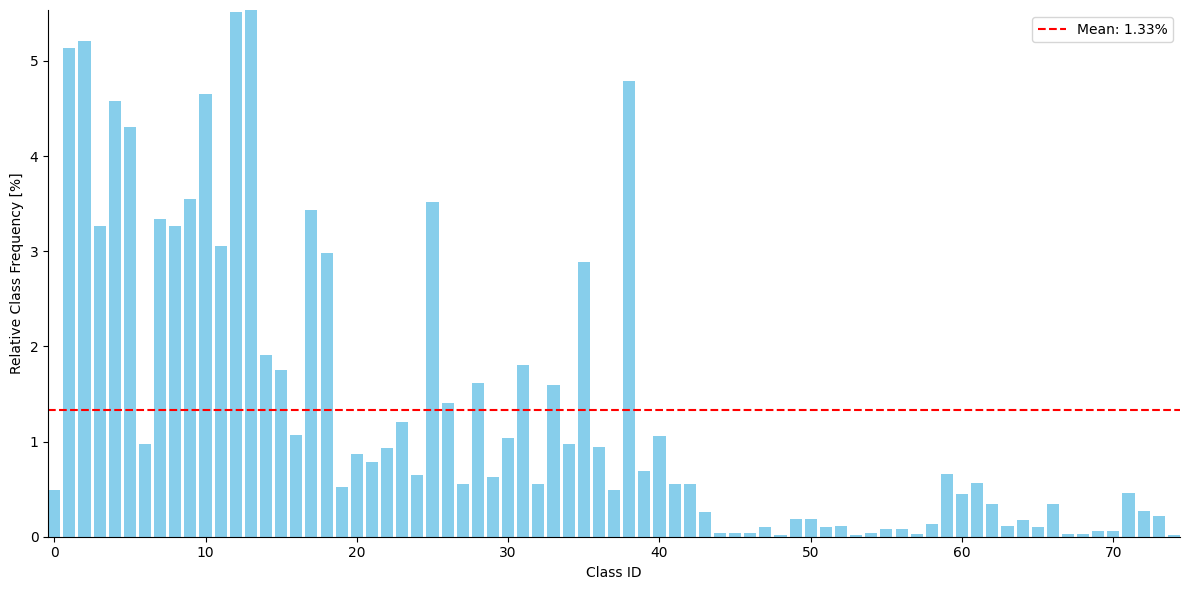

In [29]:
import os
import matplotlib.pyplot as plt

def compute_class_frequencies(dataset_path, valid_extensions=('.jpg', '.jpeg', '.png', '.ppm')):
    class_counts = {}
    
    # Traverse the dataset directory
    for class_id in os.listdir(dataset_path):
        class_dir = os.path.join(dataset_path, class_id)
        if os.path.isdir(class_dir):
            count = 0
            # Count all files with valid image extensions
            for file in os.listdir(class_dir):
                if file.lower().endswith(valid_extensions):
                    count += 1
            class_counts[class_id] = count
    
    return class_counts

def plot_relative_class_frequencies(dataset_path):
    # Compute class frequencies
    class_counts = compute_class_frequencies(dataset_path)
    total_samples = sum(class_counts.values())
    class_frequencies = {cls: (count / total_samples) * 100 for cls, count in class_counts.items()}
    
    # Sorting classes by class ID if they are not in order
    sorted_classes = sorted(class_frequencies.items(), key=lambda x: int(x[0]))  # Assuming class IDs are numeric
    
    # Unpacking the sorted items
    classes, frequencies = zip(*sorted_classes)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(classes, frequencies, color='skyblue')
    plt.xlabel('Class ID')
    plt.ylabel('Relative Class Frequency [%]')
    
    # Calculate and plot the mean frequency
    mean_frequency = sum(frequencies) / len(frequencies)
    plt.axhline(y=mean_frequency, color='r', linestyle='--', label=f'Mean: {mean_frequency:.2f}%')
    plt.legend()

    plt.xticks([int(cls) for cls in classes if int(cls) % 10 == 0])  # Show only labels that are multiples of 10
    plt.margins(x=0, y=0)  # Reduce margins to use maximum space
    ax = plt.gca()  # Get current axes
    ax.spines['top'].set_visible(False)  # Hide top spine
    ax.spines['right'].set_visible(False)    
    plt.tight_layout()
    plt.show()

# Example usage:
dataset_path = r"D:\Faculty materials\bachelors\datasets\GermanAndBelgianTS"  # Replace this with the path to your dataset
plot_relative_class_frequencies(dataset_path)
